In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bh_df=pd.read_csv('BostonHousing.csv')

In [73]:
bh_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [74]:
bh_df=bh_df.rename(columns={'MEDV':'PRICE'})

Price is our target 

In [75]:
bh_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [76]:
bh_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [77]:
corr=bh_df.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
LSTAT    0.455621 -0.412995 

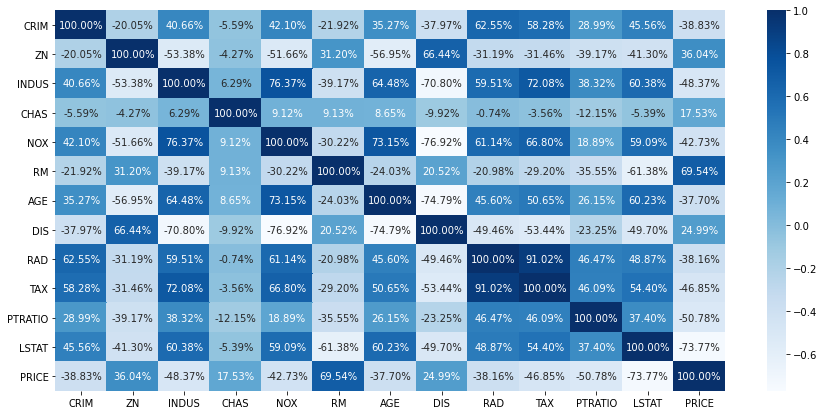

In [78]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,fmt='.2%',cmap='Blues',annot=True);


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

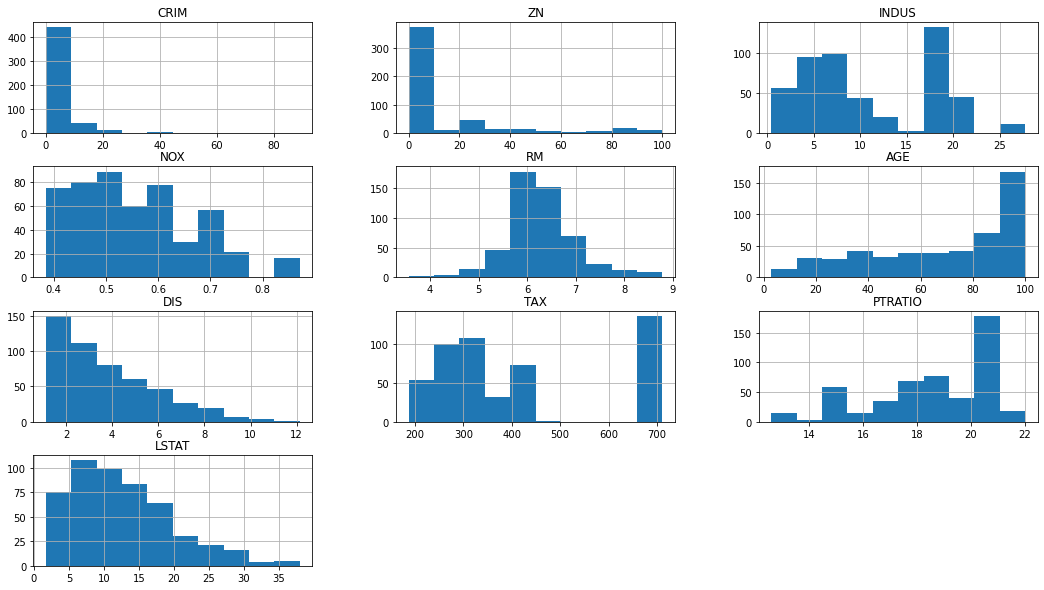

In [79]:
bh_df.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'LSTAT',], figsize=(18,10))

array([[<AxesSubplot:title={'center':'PRICE'}>]], dtype=object)

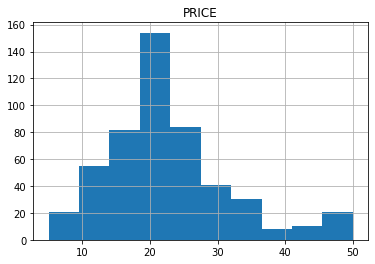

In [80]:
#TARGET VARIABLE 
bh_df.hist('PRICE')

In [81]:
#RM - avg number of rooms per home range is 0-10 but there are no homes with 0 rooms or 10 rooms
#we convered it into bins beacuse we cant have a house with 7.1 rooms or stuff --- continous to categorical data
bh_df['Rm_bin']=pd.cut(bh_df.RM,range(0,10), labels=False)
bh_df.drop('RM', axis=1, inplace=True)
print(bh_df)

        CRIM    ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  65.2  4.0900    1  296     15.3   
1    0.02731   0.0   7.07     0  0.469  78.9  4.9671    2  242     17.8   
2    0.02729   0.0   7.07     0  0.469  61.1  4.9671    2  242     17.8   
3    0.03237   0.0   2.18     0  0.458  45.8  6.0622    3  222     18.7   
4    0.06905   0.0   2.18     0  0.458  54.2  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...   ...     ...  ...  ...      ...   
501  0.06263   0.0  11.93     0  0.573  69.1  2.4786    1  273     21.0   
502  0.04527   0.0  11.93     0  0.573  76.7  2.2875    1  273     21.0   
503  0.06076   0.0  11.93     0  0.573  91.0  2.1675    1  273     21.0   
504  0.10959   0.0  11.93     0  0.573  89.3  2.3889    1  273     21.0   
505  0.04741   0.0  11.93     0  0.573  80.8  2.5050    1  273     21.0   

     LSTAT  PRICE  Rm_bin  
0     4.98   24.0       6  
1     9.14   21.6       6  
2     4.03   34

In [82]:
print(bh_df)

        CRIM    ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  65.2  4.0900    1  296     15.3   
1    0.02731   0.0   7.07     0  0.469  78.9  4.9671    2  242     17.8   
2    0.02729   0.0   7.07     0  0.469  61.1  4.9671    2  242     17.8   
3    0.03237   0.0   2.18     0  0.458  45.8  6.0622    3  222     18.7   
4    0.06905   0.0   2.18     0  0.458  54.2  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...   ...     ...  ...  ...      ...   
501  0.06263   0.0  11.93     0  0.573  69.1  2.4786    1  273     21.0   
502  0.04527   0.0  11.93     0  0.573  76.7  2.2875    1  273     21.0   
503  0.06076   0.0  11.93     0  0.573  91.0  2.1675    1  273     21.0   
504  0.10959   0.0  11.93     0  0.573  89.3  2.3889    1  273     21.0   
505  0.04741   0.0  11.93     0  0.573  80.8  2.5050    1  273     21.0   

     LSTAT  PRICE  Rm_bin  
0     4.98   24.0       6  
1     9.14   21.6       6  
2     4.03   34

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from dmba import stepwise_selection,forward_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary

In [84]:
#inputting variables
pred=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','Rm_bin']
Y=bh_df.iloc[:,11]

In [85]:
X=bh_df[pred]
print(X)

        CRIM    ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  65.2  4.0900    1  296     15.3   
1    0.02731   0.0   7.07     0  0.469  78.9  4.9671    2  242     17.8   
2    0.02729   0.0   7.07     0  0.469  61.1  4.9671    2  242     17.8   
3    0.03237   0.0   2.18     0  0.458  45.8  6.0622    3  222     18.7   
4    0.06905   0.0   2.18     0  0.458  54.2  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...   ...     ...  ...  ...      ...   
501  0.06263   0.0  11.93     0  0.573  69.1  2.4786    1  273     21.0   
502  0.04527   0.0  11.93     0  0.573  76.7  2.2875    1  273     21.0   
503  0.06076   0.0  11.93     0  0.573  91.0  2.1675    1  273     21.0   
504  0.10959   0.0  11.93     0  0.573  89.3  2.3889    1  273     21.0   
505  0.04741   0.0  11.93     0  0.573  80.8  2.5050    1  273     21.0   

     LSTAT  Rm_bin  
0     4.98       6  
1     9.14       6  
2     4.03       7  
3     2.94     

In [86]:
#verifying the input
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [87]:
#splitting the data
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.5, random_state=35)

In [88]:
#forward selection
def train_model(variables):
    if len(variables) ==0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables],train_Y)
    return model

def score_model(model, variables):
    if len(variables)==0:
        return AIC_score(train_Y, [train_Y.mean()]*len(train_Y), model, df=1)
    return AIC_score(train_Y, model.predict(train_X[variables]),model)

best_model, best_variables = forward_selection(train_X.columns,train_model,score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, Rm_bin
Start: score=1871.00, constant
Step: score=1676.07, add LSTAT
Step: score=1631.15, add PTRATIO
Step: score=1601.76, add Rm_bin
Step: score=1593.92, add DIS
Step: score=1582.97, add NOX
Step: score=1577.94, add CHAS
Step: score=1576.01, add CRIM
Step: score=1574.31, add ZN
Step: score=1574.12, add RAD
Step: score=1566.56, add TAX
Step: score=1566.56, add None
['LSTAT', 'PTRATIO', 'Rm_bin', 'DIS', 'NOX', 'CHAS', 'CRIM', 'ZN', 'RAD', 'TAX']


The top 4 features are LSTAT', 'PTRATIO', 'Rm_bin', 'DIS'

# linear regression using the 3 features based on forward fe== selection

In [90]:
predictors2= ['LSTAT','PTRATIO','Rm_bin']
outcome2='PRICE'
x1=bh_df[predictors2]
Y1=bh_df[outcome2]

In [91]:
Y1

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [92]:
#splitting the data from the 4 predictors into trainig and testing
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(x1, Y1, test_size=0.5, random_state=35)

In [93]:
#sanity check for the sampled data
print(train_X1.shape)
print(train_Y1.shape)
print(test_X1.shape)
print(test_Y1.shape)

(253, 3)
(253,)
(253, 3)
(253,)


In [94]:
bh_lm=LinearRegression()
bh_lm.fit(train_X1,train_Y1)
print('intercept',bh_lm.intercept_)
print(pd.DataFrame({'predictor': x1.columns,'coefficient':bh_lm.coef_}))

intercept 34.70675563774179
  predictor  coefficient
0     LSTAT    -0.677679
1   PTRATIO    -1.104120
2    Rm_bin     2.932617


In [95]:
# print the R-squared value for  training 
print("Train score:")
bh_lm.score(train_X1,train_Y1)


Train score:


0.6630706032451743

In [97]:
#predicted values using the test data
bh_lm_pred = bh_lm.predict(test_X1)

result = pd.DataFrame({'Predicted': bh_lm_pred, 'Actual':test_Y1,
                       'Residual': test_Y1 - bh_lm_pred})
print(result.head(10))

     Predicted  Actual   Residual
483  20.005194    21.8   1.794806
330  27.482721    19.8  -7.682721
287  29.135431    23.2  -5.935431
146  21.855914    15.6  -6.255914
416  12.521882     7.5  -5.021882
469  17.064066    20.1   3.035934
6    27.096277    22.9  -4.196277
70   26.549344    24.2  -2.349344
174  24.508616    22.6  -1.908616
155  25.893148    15.6 -10.293148


In [98]:
# print the R-squared value for test 
print("Test score:")
bh_lm.score(test_X1,test_Y1)

Test score:


0.6297233628891288

In [101]:
# print the R-squared value for test 
regressionSummary(test_Y1, bh_lm_pred)


Regression statistics

                      Mean Error (ME) : -0.3142
       Root Mean Squared Error (RMSE) : 5.2450
            Mean Absolute Error (MAE) : 3.8092
          Mean Percentage Error (MPE) : -5.1175
Mean Absolute Percentage Error (MAPE) : 19.8176


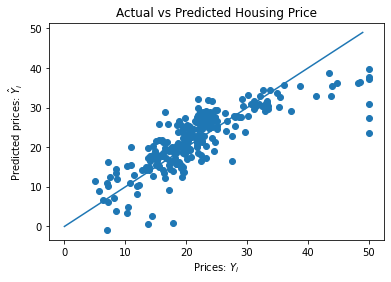

In [102]:
plt.scatter(test_Y1, bh_lm_pred)
plt.plot(range(50), range(50))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual vs Predicted Housing Price")

plt.show()

# KNN

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [104]:
#minmax wiil be used since data is not normally distributed
scaler=preprocessing.MinMaxScaler()
X_train_scaled=scaler.fit_transform(train_X1[['LSTAT','PTRATIO','Rm_bin']])
X_test_scaled=scaler.fit_transform(test_X1[['LSTAT','PTRATIO','Rm_bin']])

In [105]:
## Verify minimum value of all features
X_train_scaled.min(axis=0)

array([0., 0., 0.])

In [106]:
X_train_scaled.max(axis=0)

array([1., 1., 1.])

In [107]:
# Sanity check for the sampled data
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(253, 3)
(253, 3)


# Finding the optimal K value

In [108]:
knn_r_acc = []
for i in range(1,20,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled,train_Y1)
    test_score = knn.score(X_test_scaled,test_Y1)
    train_score = knn.score(X_train_scaled,train_Y1)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.593073     1.000000
1    2    0.632915     0.905564
2    3    0.679093     0.869073
3    4    0.680649     0.857284
4    5    0.702486     0.835049
5    6    0.699306     0.828952
6    7    0.707722     0.825819
7    8    0.702891     0.813371
8    9    0.698613     0.805592
9   10    0.699094     0.798942
10  11    0.699707     0.794818
11  12    0.694402     0.790742
12  13    0.687223     0.783766
13  14    0.690633     0.777894
14  15    0.688664     0.773626
15  16    0.682214     0.769627
16  17    0.680626     0.767193
17  18    0.675518     0.763013
18  19    0.670526     0.761688


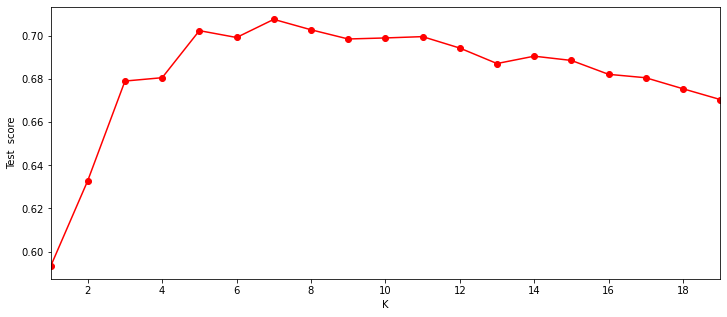

In [109]:
plt.figure(figsize=(12, 5))
plt.plot(df['K'],df ['Test Score'],color='red',marker='o')
plt.xlim([1,19])
plt.xlabel('K')
plt.ylabel('Test  score')
plt.show()

optimal k value is 7

In [68]:
best_knr=KNeighborsRegressor(n_neighbors=7)
best_knr.fit(X_train_scaled,train_Y1)

KNeighborsRegressor(n_neighbors=7)

In [114]:
#predcited values for k=7
knr_pred=best_knr.predict(X_test_scaled)
KNR_result = pd.DataFrame({'Predicted': knr_pred, 'Actual':test_Y1,
                       'Residual': test_Y1 - knr_pred})
print(KNR_result.head(10))

     Predicted  Actual  Residual
483  24.800000    21.8 -3.000000
330  21.857143    19.8 -2.057143
287  25.242857    23.2 -2.042857
146  17.171429    15.6 -1.571429
416  10.214286     7.5 -2.714286
469  16.442857    20.1  3.657143
6    17.671429    22.9  5.228571
70   24.157143    24.2  0.042857
174  20.971429    22.6  1.628571
155  18.642857    15.6 -3.042857


In [115]:
regressionSummary(test_Y1, knr_pred)


Regression statistics

                      Mean Error (ME) : 0.7464
       Root Mean Squared Error (RMSE) : 4.6599
            Mean Absolute Error (MAE) : 3.2188
          Mean Percentage Error (MPE) : -0.0310
Mean Absolute Percentage Error (MAPE) : 15.6239


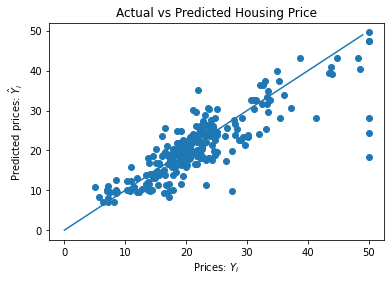

In [113]:
plt.scatter(test_Y1, knr_pred)
plt.plot(range(50), range(50))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual vs Predicted Housing Price")

plt.show()

Overall, KNN is the better model at predicting boston housing prices